In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import learning_curve

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [3]:
houses = pd.read_csv('train.csv')
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

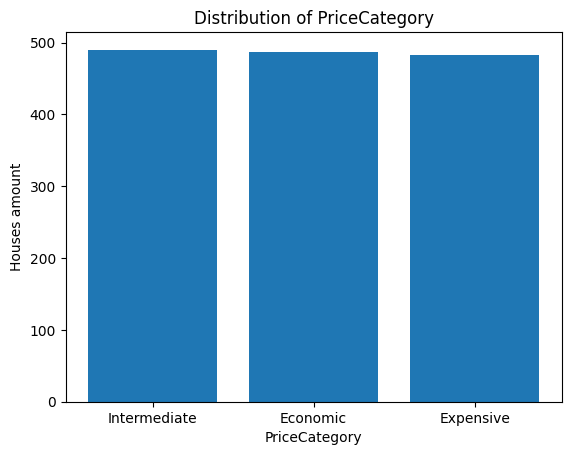

In [11]:
# Define the category names
categories = ['Economic', 'Intermediate', 'Expensive']

# Create a new column in the DataFrame for the categories
houses['PriceCategory'] = pd.qcut(houses['SalePrice'], q=len(categories), labels=categories)

# Verificar la distribución de las categorías
plt.bar(houses['PriceCategory'].value_counts().index, houses['PriceCategory'].value_counts().values)
plt.xlabel('PriceCategory')
plt.ylabel('Houses amount')
plt.title('Distribution of PriceCategory')
plt.show()

In [13]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
num_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [16]:
preprocessor = ColumnTransformer([
    ('Categorial columns',categorical_preprocessor, categorical_columns),
    ('Numerical columns',num_preprocessor, numerical_columns)
], remainder="passthrough")

In [17]:
model = make_pipeline(
  preprocessor,
  MLPClassifier(
    activation="relu",
    verbose=True,
    hidden_layer_sizes=(30, 20),
    max_iter=500
  )
)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [19]:
target = houses.pop('PriceCategory')
data = houses.drop(['Id', 'SalePrice'], axis=1)

In [20]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [21]:
model.fit(data_train,target_train)

Iteration 1, loss = 1.06873176
Iteration 2, loss = 0.96081285
Iteration 3, loss = 0.86611492
Iteration 4, loss = 0.77586243
Iteration 5, loss = 0.69691919
Iteration 6, loss = 0.62808144
Iteration 7, loss = 0.57090404
Iteration 8, loss = 0.52312750
Iteration 9, loss = 0.48214123
Iteration 10, loss = 0.44853857
Iteration 11, loss = 0.42046639
Iteration 12, loss = 0.39868612
Iteration 13, loss = 0.37885441
Iteration 14, loss = 0.36046953
Iteration 15, loss = 0.34352792
Iteration 16, loss = 0.33370591
Iteration 17, loss = 0.31995579
Iteration 18, loss = 0.31055816
Iteration 19, loss = 0.30237995
Iteration 20, loss = 0.29240694
Iteration 21, loss = 0.28630760
Iteration 22, loss = 0.27679145
Iteration 23, loss = 0.26996708
Iteration 24, loss = 0.26186925
Iteration 25, loss = 0.25971998
Iteration 26, loss = 0.24893623
Iteration 27, loss = 0.24830246
Iteration 28, loss = 0.23764475
Iteration 29, loss = 0.23475239
Iteration 30, loss = 0.22765482
Iteration 31, loss = 0.22177339
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [22]:
pred = model.predict(data_test)

Accuracy: 0.829
Precision: 0.829
recall: 0.829


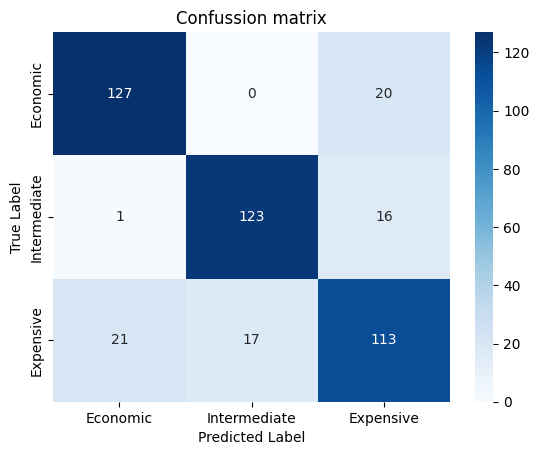

In [28]:
cm = confusion_matrix(target_test,pred)
accuracy = accuracy_score(target_test,pred)
precision = precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
model1 = make_pipeline(preprocessor,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(), max_iter=300))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [30]:
model1.fit(data_train,target_train)

Iteration 1, loss = 0.99796879
Iteration 2, loss = 0.90682169
Iteration 3, loss = 0.84729658
Iteration 4, loss = 0.79803561
Iteration 5, loss = 0.75423199
Iteration 6, loss = 0.71649531
Iteration 7, loss = 0.68585791
Iteration 8, loss = 0.66063429
Iteration 9, loss = 0.63886699
Iteration 10, loss = 0.61976365
Iteration 11, loss = 0.60143681
Iteration 12, loss = 0.58524398
Iteration 13, loss = 0.57188950
Iteration 14, loss = 0.55951732
Iteration 15, loss = 0.54832807
Iteration 16, loss = 0.53832144
Iteration 17, loss = 0.52834996
Iteration 18, loss = 0.52006986
Iteration 19, loss = 0.51232533
Iteration 20, loss = 0.50540096
Iteration 21, loss = 0.49815479
Iteration 22, loss = 0.49146832
Iteration 23, loss = 0.48594449
Iteration 24, loss = 0.48104507
Iteration 25, loss = 0.47520078
Iteration 26, loss = 0.46972774
Iteration 27, loss = 0.46514431
Iteration 28, loss = 0.45990206
Iteration 29, loss = 0.45530130
Iteration 30, loss = 0.45091127
Iteration 31, loss = 0.44638954
Iteration 32, los

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [31]:
pred1 = model1.predict(data_test)

Accuracy: 0.79
Precision: 0.79
recall: 0.79


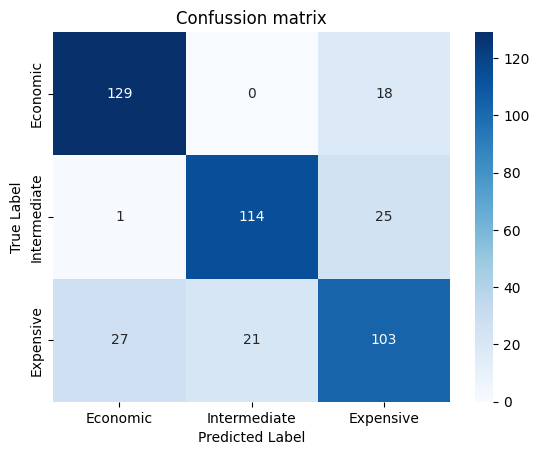

In [32]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')

print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
parametros_tun  = param_grid = {
  'mlpclassifier__max_iter': (100,200,500,1000),
  'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,10),
  'mlpclassifier__hidden_layer_sizes':((30,20),(50,30),(10,20))
}
model_grid_search = GridSearchCV(model1, param_grid=parametros_tun, n_jobs=2, cv=10) # two processors(n_jobs), & 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 1.24013396
Iteration 2, loss = 0.98481151
Iteration 3, loss = 0.82644561
Iteration 4, loss = 0.71634568
Iteration 5, loss = 0.63845890
Iteration 6, loss = 0.58142376
Iteration 7, loss = 0.53884745
Iteration 8, loss = 0.50983540
Iteration 9, loss = 0.48361309
Iteration 10, loss = 0.46562109
Iteration 11, loss = 0.44741048
Iteration 12, loss = 0.43191251
Iteration 13, loss = 0.42016751
Iteration 14, loss = 0.40788937
Iteration 15, loss = 0.40163235
Iteration 16, loss = 0.39622804
Iteration 17, loss = 0.38605221
Iteration 18, loss = 0.38015293
Iteration 19, loss = 0.37613437
Iteration 20, loss = 0.36532531
Iteration 21, loss = 0.36090672
Iteration 22, loss = 0.35524999
Iteration 23, loss = 0.35200423
Iteration 24, loss = 0.35027712
Iteration 25, loss = 0.34294770
Iteration 26, loss = 0.33776416
Iteration 27, loss = 0.33753017
Iteration 28, loss = 0.33635491
Iteration 29, loss = 0.33071879
Iteration 30, loss = 0.32539827
Iteration 31, loss = 0.32205666
Iteration 32, los

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Categorial '
                                                                         'columns',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle'...
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(),
                                                      max_iter=300,
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((30, 20),
                                                               (50, 30),
                                                               (10, 20)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [34]:
model_grid_search.best_params_

{'mlpclassifier__hidden_layer_sizes': (10, 20),
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_iter': 100}

In [35]:
pred = model_grid_search.predict(data_test)

Accuracy: 0.799
Precision: 0.799
recall: 0.799


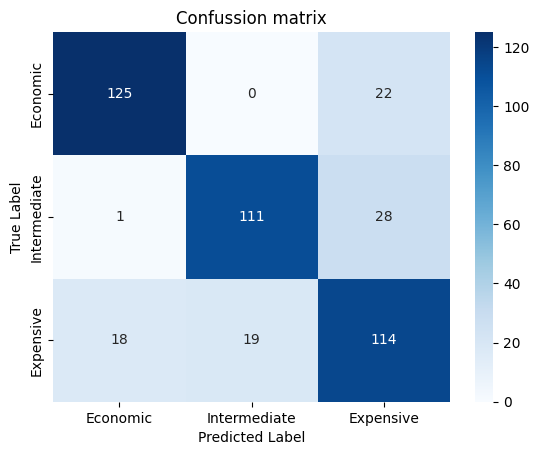

In [36]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')

print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Obtaining SalePrice

In [15]:
houses = pd.read_csv('train.csv')
y = houses.pop("SalePrice")
X = houses
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [38]:
categorical_preprocessor = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("imputer", SimpleImputer(strategy="median"))])
num_preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

In [40]:
preprocessor = ColumnTransformer([
  ('Variables Categóricas',categorical_preprocessor, categorical_columns),
  ('Variables Numéricas',num_preprocessor, numerical_columns)
], remainder="passthrough")

In [16]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [42]:
y_train

841     157500
878     148000
1412     90000
999     206000
638      85000
         ...  
1302    290000
67      226000
200     140000
1456    210000
584     133000
Name: SalePrice, Length: 1021, dtype: int64

In [44]:
model = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

Fit model

In [45]:
model.fit(X_train, y_train)

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [46]:
pred1 = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, pred1)
print(f"MSE (test): {round(mse, 3)}")
mae_test = mean_absolute_error(y_test, pred1)
print(f"MAE (test): {round(mae_test, 3)}")
rmse_test = np.sqrt(mse)
print(f"RMSE (test): {round(rmse_test, 3)}")

MSE (test): 1740102920.119
MAE (test): 23523.946
RMSE (test): 41714.541


In [49]:
modelBetter = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(150, 70), activation='relu', solver='adam', alpha=0.000001, batch_size='auto', learning_rate='constant', learning_rate_init=0.01, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.5, beta_2=0.999, epsilon=1e-12, n_iter_no_change=20))

In [50]:
modelBetter.fit(X_train, y_train)

Iteration 1, loss = 19553114314.64188385
Iteration 2, loss = 18901730800.35139084
Iteration 3, loss = 15821400936.57841301
Iteration 4, loss = 10114414874.61103439
Iteration 5, loss = 6933074567.72692680
Iteration 6, loss = 6670136820.37069130
Iteration 7, loss = 6548890995.05735111
Iteration 8, loss = 6429236098.55772495
Iteration 9, loss = 6291072433.57042313
Iteration 10, loss = 6111179960.80286312
Iteration 11, loss = 5915404997.66331005
Iteration 12, loss = 5682584039.04984188
Iteration 13, loss = 5573467549.97623158
Iteration 14, loss = 5163681996.93562412
Iteration 15, loss = 4967806747.48882008
Iteration 16, loss = 4555972900.65242481
Iteration 17, loss = 4111297864.43547726
Iteration 18, loss = 3669661935.44529724
Iteration 19, loss = 3102538342.86107683
Iteration 20, loss = 2576744943.63245869
Iteration 21, loss = 2060802560.89790249
Iteration 22, loss = 1670228707.51110244
Iteration 23, loss = 1322696986.01026702
Iteration 24, loss = 1074983831.61840868
Iteration 25, loss = 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(alpha=1e-06, beta_1=0.5, epsilon=1e-12,
                              hidden_layer_sizes=(150, 70),
                              learning_rate_init=0.01, max_iter=350,
                              n_iter_no_change=20, verbose=True))])

In [51]:
predBetter = modelBetter.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, predBetter)
print(f"MSE (test): {round(mse, 3)}")
mae_test = mean_absolute_error(y_test, predBetter)
print(f"MAE (test): {round(mae_test, 3)}")
rmse_test = np.sqrt(mse)
print(f"RMSE (test): {round(rmse_test, 3)}")

MSE (test): 1995184192.925
MAE (test): 17179.332
RMSE (test): 44667.485


C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\A

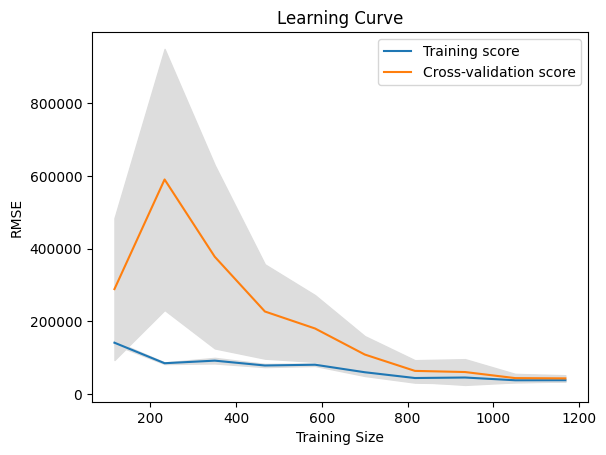

In [53]:
# Create a function to calculate RMSE
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring=rmse_scorer)

# Calculate the means and standard deviations of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Draw learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

# Modelo 2 SalePrice

In [12]:
model2 = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0002, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-20, n_iter_no_change=10))
model2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [19]:
model2.fit(X_train, y_train)

Iteration 1, loss = 19426293718.09574509
Iteration 2, loss = 19426273025.93040848
Iteration 3, loss = 19426251924.52579880
Iteration 4, loss = 19426230577.58409500
Iteration 5, loss = 19426208924.90515518
Iteration 6, loss = 19426185895.92480469
Iteration 7, loss = 19426161337.27350998
Iteration 8, loss = 19426137068.46441650
Iteration 9, loss = 19426114632.76001740
Iteration 10, loss = 19426093990.66885376
Iteration 11, loss = 19426074387.21084213
Iteration 12, loss = 19426055423.31730270
Iteration 13, loss = 19426036176.20848083
Iteration 14, loss = 19426015332.75076294
Iteration 15, loss = 19425992506.23445511
Iteration 16, loss = 19425970700.44875717
Iteration 17, loss = 19425949189.22863007
Iteration 18, loss = 19425928142.44419098
Iteration 19, loss = 19425908136.19379044
Iteration 20, loss = 19425888756.57203293
Iteration 21, loss = 19425868770.69408798
Iteration 22, loss = 19425848633.73057556
Iteration 23, loss = 19425831181.57788849
Iteration 24, loss = 19425815008.89734650
I

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])

In [20]:
pred2 = model2.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, pred2)
print(f"MSE (test): {round(mse, 3)}")
mae_test = mean_absolute_error(y_test, pred2)
print(f"MAE (test): {round(mae_test, 3)}")
rmse_test = np.sqrt(mse)
print(f"RMSE (test): {round(rmse_test, 3)}")

MSE (test): 39536611472.8
MAE (test): 180961.457
RMSE (test): 198838.154


c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 1, loss = 17.69098607
Iteration 2, loss = 17.43253842
Iteration 3, loss = 17.17745266
Iteration 4, loss = 16.92669447
Iteration 5, loss = 16.68049260
Iteration 6, loss = 16.43530697
Iteration 7, loss = 16.18978119
Iteration 8, loss = 15.94528460
Iteration 9, loss = 15.70450120
Iteration 10, loss = 15.46492205
Iteration 11, loss = 15.22876489
Iteration 12, loss = 14.99563752
Iteration 13, loss = 14.76187630
Iteration 14, loss = 14.52751514
Iteration 15, loss = 14.28951917
Iteration 16, loss = 14.05412979
Iteration 17, loss = 13.82147660
Iteration 18, loss = 13.59186006
Iteration 19, loss = 13.36575420
Iteration 20, loss = 13.14077505
Iteration 21, loss = 12.91860560
Iteration 22, loss = 12.69807600
Iteration 23, loss = 12.48182951
Iteration 24, loss = 12.27072196
Iteration 25, loss = 12.06442322
Iteration 26, loss = 11.85722265
Iteration 27, loss = 11.65125295
Iteration 28, loss = 11.44753413
Iteration 29, loss = 11.24536300
Iteration 30, loss = 11.04309165
Iteration 31, loss 

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.22415286
Iteration 2, loss = 21.72918739
Iteration 3, loss = 21.26718956
Iteration 4, loss = 20.80554392
Iteration 5, loss = 20.37707706
Iteration 6, loss = 19.95819811
Iteration 7, loss = 19.55028775
Iteration 8, loss = 19.16204300
Iteration 9, loss = 18.78720519
Iteration 10, loss = 18.40267370
Iteration 11, loss = 18.01171691
Iteration 12, loss = 17.62103480
Iteration 13, loss = 17.24022152
Iteration 14, loss = 16.86369516
Iteration 15, loss = 16.50105449
Iteration 16, loss = 16.14756836
Iteration 17, loss = 15.79734948
Iteration 18, loss = 15.44375747
Iteration 19, loss = 15.08650322
Iteration 20, loss = 14.73904402
Iteration 21, loss = 14.38509174
Iteration 22, loss = 14.06033980
Iteration 23, loss = 13.74436248
Iteration 24, loss = 13.42886502
Iteration 25, loss = 13.11256316
Iteration 26, loss = 12.80696866
Iteration 27, loss = 12.50115592
Iteration 28, loss = 12.18745417
Iteration 29, loss = 11.87378301
Iteration 30, loss = 11.57539300
Iteration 31, loss 

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 23.94477171
Iteration 3, loss = 23.40794170
Iteration 4, loss = 22.87387194
Iteration 5, loss = 22.32907788
Iteration 6, loss = 21.80126689
Iteration 7, loss = 21.31544790
Iteration 8, loss = 20.83800841
Iteration 9, loss = 20.36956566
Iteration 10, loss = 19.93529857
Iteration 11, loss = 19.48489077
Iteration 12, loss = 19.03825490
Iteration 13, loss = 18.57999182
Iteration 14, loss = 18.13396529
Iteration 15, loss = 17.66479262
Iteration 16, loss = 17.20965529
Iteration 17, loss = 16.76706364
Iteration 18, loss = 16.33283725
Iteration 19, loss = 15.88846047
Iteration 20, loss = 15.45226258
Iteration 21, loss = 15.02998660
Iteration 22, loss = 14.61217838
Iteration 23, loss = 14.19440651
Iteration 24, loss = 13.79508009
Iteration 25, loss = 13.42345934
Iteration 26, loss = 13.04145487
Iteration 27, loss = 12.64617307
Iteration 28, loss = 12.25719346
Iteration 29, loss = 11.87341603
Iteration 30, loss = 11.50660194
Iteration 31, loss = 11.15210749
Iteration 32, loss

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.78734010
Iteration 2, loss = 24.99281352
Iteration 3, loss = 24.25826231
Iteration 4, loss = 23.53023341
Iteration 5, loss = 22.83902618
Iteration 6, loss = 22.11821575
Iteration 7, loss = 21.40590015
Iteration 8, loss = 20.74051486
Iteration 9, loss = 20.03405093
Iteration 10, loss = 19.35720261
Iteration 11, loss = 18.69964715
Iteration 12, loss = 18.07313823
Iteration 13, loss = 17.46049388
Iteration 14, loss = 16.88804778
Iteration 15, loss = 16.32338067
Iteration 16, loss = 15.75812842
Iteration 17, loss = 15.15890759
Iteration 18, loss = 14.56890173
Iteration 19, loss = 13.99065215
Iteration 20, loss = 13.44807938
Iteration 21, loss = 12.89280930
Iteration 22, loss = 12.36255246
Iteration 23, loss = 11.85511048
Iteration 24, loss = 11.37995502
Iteration 25, loss = 10.95323735
Iteration 26, loss = 10.49755941
Iteration 27, loss = 10.07339050
Iteration 28, loss = 9.63930900
Iteration 29, loss = 9.21211605
Iteration 30, loss = 8.83193564
Iteration 31, loss = 8

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 25.21408855
Iteration 3, loss = 24.38004499
Iteration 4, loss = 23.69653343
Iteration 5, loss = 23.05289507
Iteration 6, loss = 22.41710612
Iteration 7, loss = 21.75146638
Iteration 8, loss = 21.03765152
Iteration 9, loss = 20.35909573
Iteration 10, loss = 19.72489166
Iteration 11, loss = 19.11395608
Iteration 12, loss = 18.45767733
Iteration 13, loss = 17.81744500
Iteration 14, loss = 17.13951759
Iteration 15, loss = 16.47583643
Iteration 16, loss = 15.85180540
Iteration 17, loss = 15.27001508
Iteration 18, loss = 14.77796166
Iteration 19, loss = 14.22807916
Iteration 20, loss = 13.67729859
Iteration 21, loss = 13.15915168
Iteration 22, loss = 12.66707075
Iteration 23, loss = 12.16135600
Iteration 24, loss = 11.66856962
Iteration 25, loss = 11.19537072
Iteration 26, loss = 10.71758782
Iteration 27, loss = 10.29986774
Iteration 28, loss = 9.86882928
Iteration 29, loss = 9.44519476
Iteration 30, loss = 9.01811159
Iteration 31, loss = 8.61898639
Iteration 32, loss = 8

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.49579123
Iteration 2, loss = 25.44206895
Iteration 3, loss = 24.44777932
Iteration 4, loss = 23.59116272
Iteration 5, loss = 22.78092411
Iteration 6, loss = 21.98784784
Iteration 7, loss = 21.16057697
Iteration 8, loss = 20.36475561
Iteration 9, loss = 19.50592660
Iteration 10, loss = 18.65426739
Iteration 11, loss = 17.79954482
Iteration 12, loss = 16.99121920
Iteration 13, loss = 16.25594042
Iteration 14, loss = 15.48372054
Iteration 15, loss = 14.77394467
Iteration 16, loss = 14.07395124
Iteration 17, loss = 13.42174423
Iteration 18, loss = 12.72977837
Iteration 19, loss = 12.05295409
Iteration 20, loss = 11.41137098
Iteration 21, loss = 10.81091628
Iteration 22, loss = 10.19611234
Iteration 23, loss = 9.59679122
Iteration 24, loss = 9.08879984
Iteration 25, loss = 8.56451244
Iteration 26, loss = 8.06598507
Iteration 27, loss = 7.59338403
Iteration 28, loss = 7.13987058
Iteration 29, loss = 6.71396404
Iteration 30, loss = 6.32211027
Iteration 31, loss = 5.9881

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 28.66756168
Iteration 2, loss = 27.45155210
Iteration 3, loss = 26.31760448
Iteration 4, loss = 25.27211162
Iteration 5, loss = 24.26913493
Iteration 6, loss = 23.30995796
Iteration 7, loss = 22.40044400
Iteration 8, loss = 21.52985251
Iteration 9, loss = 20.65168112
Iteration 10, loss = 19.80902514
Iteration 11, loss = 18.97733669
Iteration 12, loss = 18.19329421
Iteration 13, loss = 17.45704221
Iteration 14, loss = 16.71868076
Iteration 15, loss = 16.03721453
Iteration 16, loss = 15.32752980
Iteration 17, loss = 14.66930449
Iteration 18, loss = 14.01108522
Iteration 19, loss = 13.28834511
Iteration 20, loss = 12.60243426
Iteration 21, loss = 11.95337428
Iteration 22, loss = 11.28018474
Iteration 23, loss = 10.61350791
Iteration 24, loss = 9.99615214
Iteration 25, loss = 9.38699496
Iteration 26, loss = 8.83794387
Iteration 27, loss = 8.40138970
Iteration 28, loss = 7.90199788
Iteration 29, loss = 7.48454514
Iteration 30, loss = 7.01940845
Iteration 31, loss = 6.663

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 28.94498682
Iteration 2, loss = 27.54376879
Iteration 3, loss = 26.30365708
Iteration 4, loss = 25.15807190
Iteration 5, loss = 24.05069329
Iteration 6, loss = 22.92812047
Iteration 7, loss = 21.94219966
Iteration 8, loss = 20.91613616
Iteration 9, loss = 19.98211205
Iteration 10, loss = 19.07293368
Iteration 11, loss = 18.19358011
Iteration 12, loss = 17.22036441
Iteration 13, loss = 16.33046905
Iteration 14, loss = 15.41711547
Iteration 15, loss = 14.46145433
Iteration 16, loss = 13.52887533
Iteration 17, loss = 12.74275598
Iteration 18, loss = 11.91576465
Iteration 19, loss = 11.14374812
Iteration 20, loss = 10.40448056
Iteration 21, loss = 9.65515420
Iteration 22, loss = 8.97945544
Iteration 23, loss = 8.31331062
Iteration 24, loss = 7.69560235
Iteration 25, loss = 7.13294982
Iteration 26, loss = 6.63743467
Iteration 27, loss = 6.14176781
Iteration 28, loss = 5.71378898
Iteration 29, loss = 5.34153316
Iteration 30, loss = 4.98157392
Iteration 31, loss = 4.652516

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 29.01298665
Iteration 2, loss = 27.54073491
Iteration 3, loss = 26.15325263
Iteration 4, loss = 24.79337282
Iteration 5, loss = 23.39715627
Iteration 6, loss = 22.06507330
Iteration 7, loss = 20.86796226
Iteration 8, loss = 19.67932181
Iteration 9, loss = 18.61130791
Iteration 10, loss = 17.57102943
Iteration 11, loss = 16.59776237
Iteration 12, loss = 15.54933417
Iteration 13, loss = 14.50952517
Iteration 14, loss = 13.49678429
Iteration 15, loss = 12.53655041
Iteration 16, loss = 11.69373161
Iteration 17, loss = 10.99731255
Iteration 18, loss = 10.21639379
Iteration 19, loss = 9.56937289
Iteration 20, loss = 8.86390465
Iteration 21, loss = 8.16444308
Iteration 22, loss = 7.60348524
Iteration 23, loss = 7.03676956
Iteration 24, loss = 6.59495864
Iteration 25, loss = 6.19236594
Iteration 26, loss = 5.85360020
Iteration 27, loss = 5.53087815
Iteration 28, loss = 5.19297580
Iteration 29, loss = 4.92948289
Iteration 30, loss = 4.65369395
Iteration 31, loss = 4.38675382

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 28.92487195
Iteration 2, loss = 27.07759390
Iteration 3, loss = 25.52563240
Iteration 4, loss = 24.33730243
Iteration 5, loss = 23.26774993
Iteration 6, loss = 22.21290130
Iteration 7, loss = 21.02392036
Iteration 8, loss = 19.88141979
Iteration 9, loss = 18.77592059
Iteration 10, loss = 17.72418229
Iteration 11, loss = 16.63093995
Iteration 12, loss = 15.57035152
Iteration 13, loss = 14.41472268
Iteration 14, loss = 13.28817297
Iteration 15, loss = 12.30981156
Iteration 16, loss = 11.42947985
Iteration 17, loss = 10.53575747
Iteration 18, loss = 9.75008134
Iteration 19, loss = 8.96361435
Iteration 20, loss = 8.29015137
Iteration 21, loss = 7.67329641
Iteration 22, loss = 7.20018356
Iteration 23, loss = 6.75038244
Iteration 24, loss = 6.28923366
Iteration 25, loss = 5.91300223
Iteration 26, loss = 5.54648077
Iteration 27, loss = 5.23179077
Iteration 28, loss = 4.93873138
Iteration 29, loss = 4.66269186
Iteration 30, loss = 4.39237446
Iteration 31, loss = 4.14807938


c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 11.58725487
Iteration 2, loss = 11.38056042
Iteration 3, loss = 11.17599149
Iteration 4, loss = 10.97366622
Iteration 5, loss = 10.77374942
Iteration 6, loss = 10.57640302
Iteration 7, loss = 10.38181288
Iteration 8, loss = 10.19014663
Iteration 9, loss = 10.00148772
Iteration 10, loss = 9.81581867
Iteration 11, loss = 9.63305938
Iteration 12, loss = 9.45311128
Iteration 13, loss = 9.27587790
Iteration 14, loss = 9.10127754
Iteration 15, loss = 8.92925949
Iteration 16, loss = 8.75980903
Iteration 17, loss = 8.59293192
Iteration 18, loss = 8.42862971
Iteration 19, loss = 8.26688001
Iteration 20, loss = 8.10762723
Iteration 21, loss = 7.95078396
Iteration 22, loss = 7.79624190
Iteration 23, loss = 7.64388940
Iteration 24, loss = 7.49363060
Iteration 25, loss = 7.34539925
Iteration 26, loss = 7.19916196
Iteration 27, loss = 7.05491010
Iteration 28, loss = 6.91264417
Iteration 29, loss = 6.77235667
Iteration 30, loss = 6.63401896
Iteration 31, loss = 6.49757643
Iteratio

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 14.42098444
Iteration 10, loss = 14.05787634
Iteration 11, loss = 13.70411652
Iteration 12, loss = 13.35224651
Iteration 13, loss = 13.02137848
Iteration 14, loss = 12.68999069
Iteration 15, loss = 12.37052385
Iteration 16, loss = 12.06032141
Iteration 17, loss = 11.74253070
Iteration 18, loss = 11.43624565
Iteration 19, loss = 11.14053694
Iteration 20, loss = 10.83984095
Iteration 21, loss = 10.56705785
Iteration 22, loss = 10.29872021
Iteration 23, loss = 10.03193278
Iteration 24, loss = 9.77167557
Iteration 25, loss = 9.50799125
Iteration 26, loss = 9.24964399
Iteration 27, loss = 8.99697538
Iteration 28, loss = 8.74587811
Iteration 29, loss = 8.50505936
Iteration 30, loss = 8.26149548
Iteration 31, loss = 8.02654917
Iteration 32, loss = 7.80200069
Iteration 33, loss = 7.58250084
Iteration 34, loss = 7.37627568
Iteration 35, loss = 7.18196820
Iteration 36, loss = 6.99097309
Iteration 37, loss = 6.80599498
Iteration 38, loss = 6.62583888
Iteration 39, loss = 6.440

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 20.56768345
Iteration 3, loss = 20.08186497
Iteration 4, loss = 19.59245262
Iteration 5, loss = 19.11213466
Iteration 6, loss = 18.67965658
Iteration 7, loss = 18.23698555
Iteration 8, loss = 17.80370661
Iteration 9, loss = 17.38639210
Iteration 10, loss = 16.96845591
Iteration 11, loss = 16.54754890
Iteration 12, loss = 16.14890383
Iteration 13, loss = 15.74839333
Iteration 14, loss = 15.34481602
Iteration 15, loss = 14.96248219
Iteration 16, loss = 14.56850509
Iteration 17, loss = 14.19075550
Iteration 18, loss = 13.79736748
Iteration 19, loss = 13.39876818
Iteration 20, loss = 13.00439670
Iteration 21, loss = 12.62733096
Iteration 22, loss = 12.23639518
Iteration 23, loss = 11.84645999
Iteration 24, loss = 11.48773144
Iteration 25, loss = 11.12470078
Iteration 26, loss = 10.76754490
Iteration 27, loss = 10.40977002
Iteration 28, loss = 10.05941035
Iteration 29, loss = 9.73156573
Iteration 30, loss = 9.40384201
Iteration 31, loss = 9.05955830
Iteration 32, loss = 

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 22.87098588
Iteration 3, loss = 22.24952100
Iteration 4, loss = 21.62385357
Iteration 5, loss = 20.98396690
Iteration 6, loss = 20.36875954
Iteration 7, loss = 19.75002152
Iteration 8, loss = 19.15915306
Iteration 9, loss = 18.53245319
Iteration 10, loss = 17.91294711
Iteration 11, loss = 17.29242487
Iteration 12, loss = 16.62422017
Iteration 13, loss = 16.01831289
Iteration 14, loss = 15.39034183
Iteration 15, loss = 14.80055642
Iteration 16, loss = 14.25214205
Iteration 17, loss = 13.72742799
Iteration 18, loss = 13.20742403
Iteration 19, loss = 12.72855120
Iteration 20, loss = 12.24866938
Iteration 21, loss = 11.79698097
Iteration 22, loss = 11.35824290
Iteration 23, loss = 10.92876997
Iteration 24, loss = 10.48335385
Iteration 25, loss = 10.08296436
Iteration 26, loss = 9.66918528
Iteration 27, loss = 9.28376538
Iteration 28, loss = 8.90034976
Iteration 29, loss = 8.53105863
Iteration 30, loss = 8.17166234
Iteration 31, loss = 7.82744289
Iteration 32, loss = 7.4

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.40144723
Iteration 2, loss = 23.58019316
Iteration 3, loss = 22.84058314
Iteration 4, loss = 22.11397645
Iteration 5, loss = 21.44259723
Iteration 6, loss = 20.82210828
Iteration 7, loss = 20.17176289
Iteration 8, loss = 19.54239177
Iteration 9, loss = 18.94064582
Iteration 10, loss = 18.35707120
Iteration 11, loss = 17.75223709
Iteration 12, loss = 17.19335408
Iteration 13, loss = 16.67702273
Iteration 14, loss = 16.12505538
Iteration 15, loss = 15.57966893
Iteration 16, loss = 15.06523570
Iteration 17, loss = 14.57142915
Iteration 18, loss = 14.09498356
Iteration 19, loss = 13.65366268
Iteration 20, loss = 13.22011919
Iteration 21, loss = 12.77500341
Iteration 22, loss = 12.31399981
Iteration 23, loss = 11.86405906
Iteration 24, loss = 11.45271826
Iteration 25, loss = 11.02326963
Iteration 26, loss = 10.58630533
Iteration 27, loss = 10.14744871
Iteration 28, loss = 9.70802482
Iteration 29, loss = 9.28918371
Iteration 30, loss = 8.87287014
Iteration 31, loss = 8

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.78697980
Iteration 2, loss = 24.78182267
Iteration 3, loss = 23.82445972
Iteration 4, loss = 22.85396150
Iteration 5, loss = 21.88263057
Iteration 6, loss = 20.96047156
Iteration 7, loss = 20.11534664
Iteration 8, loss = 19.31726051
Iteration 9, loss = 18.46749867
Iteration 10, loss = 17.68126720
Iteration 11, loss = 16.93019096
Iteration 12, loss = 16.17099419
Iteration 13, loss = 15.49268201
Iteration 14, loss = 14.83630004
Iteration 15, loss = 14.16813317
Iteration 16, loss = 13.50687563
Iteration 17, loss = 12.86228300
Iteration 18, loss = 12.29238037
Iteration 19, loss = 11.71499916
Iteration 20, loss = 11.16385518
Iteration 21, loss = 10.60810330
Iteration 22, loss = 10.05829495
Iteration 23, loss = 9.51794062
Iteration 24, loss = 9.01204230
Iteration 25, loss = 8.53306413
Iteration 26, loss = 8.07646544
Iteration 27, loss = 7.62080271
Iteration 28, loss = 7.16552904
Iteration 29, loss = 6.75029830
Iteration 30, loss = 6.32655511
Iteration 31, loss = 5.9700

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.99882746
Iteration 2, loss = 24.73945247
Iteration 3, loss = 23.68864715
Iteration 4, loss = 22.74506537
Iteration 5, loss = 21.84676698
Iteration 6, loss = 21.00225296
Iteration 7, loss = 20.24320067
Iteration 8, loss = 19.38521284
Iteration 9, loss = 18.62538257
Iteration 10, loss = 17.88760164
Iteration 11, loss = 17.14107895
Iteration 12, loss = 16.42605680
Iteration 13, loss = 15.66003629
Iteration 14, loss = 14.97935074
Iteration 15, loss = 14.33196978
Iteration 16, loss = 13.69038611
Iteration 17, loss = 13.12707819
Iteration 18, loss = 12.50817693
Iteration 19, loss = 11.94175293
Iteration 20, loss = 11.38386907
Iteration 21, loss = 10.83286151
Iteration 22, loss = 10.29706707
Iteration 23, loss = 9.77047673
Iteration 24, loss = 9.31023716
Iteration 25, loss = 8.85758372
Iteration 26, loss = 8.41130918
Iteration 27, loss = 8.00494940
Iteration 28, loss = 7.61182285
Iteration 29, loss = 7.22873535
Iteration 30, loss = 6.83974215
Iteration 31, loss = 6.5181

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.70017628
Iteration 2, loss = 26.47227200
Iteration 3, loss = 25.26101158
Iteration 4, loss = 24.09262660
Iteration 5, loss = 23.10513712
Iteration 6, loss = 22.10953780
Iteration 7, loss = 21.17631726
Iteration 8, loss = 20.26258500
Iteration 9, loss = 19.24257149
Iteration 10, loss = 18.26464695
Iteration 11, loss = 17.30905143
Iteration 12, loss = 16.48064621
Iteration 13, loss = 15.69161094
Iteration 14, loss = 14.87166114
Iteration 15, loss = 14.09071406
Iteration 16, loss = 13.30654608
Iteration 17, loss = 12.51055225
Iteration 18, loss = 11.80649898
Iteration 19, loss = 11.07414758
Iteration 20, loss = 10.42783214
Iteration 21, loss = 9.82796732
Iteration 22, loss = 9.17822073
Iteration 23, loss = 8.52275743
Iteration 24, loss = 7.90531976
Iteration 25, loss = 7.28345689
Iteration 26, loss = 6.71561446
Iteration 27, loss = 6.22398721
Iteration 28, loss = 5.77942015
Iteration 29, loss = 5.37651323
Iteration 30, loss = 5.04128701
Iteration 31, loss = 4.741804

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.26886715
Iteration 2, loss = 25.80772666
Iteration 3, loss = 24.70074195
Iteration 4, loss = 23.63898073
Iteration 5, loss = 22.48933274
Iteration 6, loss = 21.40920607
Iteration 7, loss = 20.28981483
Iteration 8, loss = 19.32590109
Iteration 9, loss = 18.35803128
Iteration 10, loss = 17.49388463
Iteration 11, loss = 16.51718893
Iteration 12, loss = 15.54316995
Iteration 13, loss = 14.54795832
Iteration 14, loss = 13.64829883
Iteration 15, loss = 12.80924533
Iteration 16, loss = 12.00753459
Iteration 17, loss = 11.24768068
Iteration 18, loss = 10.44935424
Iteration 19, loss = 9.71873803
Iteration 20, loss = 8.99449266
Iteration 21, loss = 8.34018160
Iteration 22, loss = 7.76353775
Iteration 23, loss = 7.17659416
Iteration 24, loss = 6.66395669
Iteration 25, loss = 6.22215932
Iteration 26, loss = 5.79723449
Iteration 27, loss = 5.46123372
Iteration 28, loss = 5.09564428
Iteration 29, loss = 4.76389604
Iteration 30, loss = 4.49047555
Iteration 31, loss = 4.23319566

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 28.23332392
Iteration 2, loss = 26.66160083
Iteration 3, loss = 25.44383880
Iteration 4, loss = 24.37309159
Iteration 5, loss = 23.38826023
Iteration 6, loss = 22.43419354
Iteration 7, loss = 21.37916430
Iteration 8, loss = 20.38692276
Iteration 9, loss = 19.43757758
Iteration 10, loss = 18.44893590
Iteration 11, loss = 17.50982673
Iteration 12, loss = 16.54154633
Iteration 13, loss = 15.52234156
Iteration 14, loss = 14.56368318
Iteration 15, loss = 13.57269473
Iteration 16, loss = 12.58648120
Iteration 17, loss = 11.52192207
Iteration 18, loss = 10.47379562
Iteration 19, loss = 9.45934177
Iteration 20, loss = 8.61542936
Iteration 21, loss = 7.80235056
Iteration 22, loss = 7.17531647
Iteration 23, loss = 6.61833245
Iteration 24, loss = 6.13033098
Iteration 25, loss = 5.68438762
Iteration 26, loss = 5.28758912
Iteration 27, loss = 4.93495179
Iteration 28, loss = 4.62945078
Iteration 29, loss = 4.33041198
Iteration 30, loss = 4.08694175
Iteration 31, loss = 3.85639997

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 11.33554808
Iteration 6, loss = 11.13273288
Iteration 7, loss = 10.93170943
Iteration 8, loss = 10.73263806
Iteration 9, loss = 10.53568171
Iteration 10, loss = 10.34099318
Iteration 11, loss = 10.14870243
Iteration 12, loss = 9.95890573
Iteration 13, loss = 9.77166313
Iteration 14, loss = 9.58700330
Iteration 15, loss = 9.40492635
Iteration 16, loss = 9.22540007
Iteration 17, loss = 9.04835888
Iteration 18, loss = 8.87371818
Iteration 19, loss = 8.70140269
Iteration 20, loss = 8.53136958
Iteration 21, loss = 8.36361042
Iteration 22, loss = 8.19813586
Iteration 23, loss = 8.03495813
Iteration 24, loss = 7.87408252
Iteration 25, loss = 7.71550924
Iteration 26, loss = 7.55924160
Iteration 27, loss = 7.40529504
Iteration 28, loss = 7.25370279
Iteration 29, loss = 7.10451559
Iteration 30, loss = 6.95779485
Iteration 31, loss = 6.81360013
Iteration 32, loss = 6.67197285
Iteration 33, loss = 6.53291851
Iteration 34, loss = 6.39639101
Iteration 35, loss = 6.26228380
Iterat

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 13.16368351
Iteration 10, loss = 12.85892925
Iteration 11, loss = 12.56726463
Iteration 12, loss = 12.29322029
Iteration 13, loss = 12.02783788
Iteration 14, loss = 11.77593827
Iteration 15, loss = 11.53132416
Iteration 16, loss = 11.28567539
Iteration 17, loss = 11.05316207
Iteration 18, loss = 10.81703177
Iteration 19, loss = 10.58701843
Iteration 20, loss = 10.35844753
Iteration 21, loss = 10.13663580
Iteration 22, loss = 9.91602134
Iteration 23, loss = 9.70109980
Iteration 24, loss = 9.49983318
Iteration 25, loss = 9.29527285
Iteration 26, loss = 9.09241944
Iteration 27, loss = 8.89207073
Iteration 28, loss = 8.69003391
Iteration 29, loss = 8.48706040
Iteration 30, loss = 8.29030990
Iteration 31, loss = 8.09384555
Iteration 32, loss = 7.90713514
Iteration 33, loss = 7.71184320
Iteration 34, loss = 7.52050134
Iteration 35, loss = 7.33131204
Iteration 36, loss = 7.15021569
Iteration 37, loss = 6.97144388
Iteration 38, loss = 6.80191555
Iteration 39, loss = 6.63697

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.02376966
Iteration 2, loss = 20.51891974
Iteration 3, loss = 20.02032746
Iteration 4, loss = 19.52792866
Iteration 5, loss = 19.04395994
Iteration 6, loss = 18.56946122
Iteration 7, loss = 18.07616781
Iteration 8, loss = 17.58763651
Iteration 9, loss = 17.13281648
Iteration 10, loss = 16.67577423
Iteration 11, loss = 16.23376184
Iteration 12, loss = 15.79840683
Iteration 13, loss = 15.36675259
Iteration 14, loss = 14.95204376
Iteration 15, loss = 14.55190451
Iteration 16, loss = 14.16036293
Iteration 17, loss = 13.77370289
Iteration 18, loss = 13.40237197
Iteration 19, loss = 13.02220071
Iteration 20, loss = 12.63072754
Iteration 21, loss = 12.26148306
Iteration 22, loss = 11.89822273
Iteration 23, loss = 11.54367003
Iteration 24, loss = 11.18455400
Iteration 25, loss = 10.83667193
Iteration 26, loss = 10.51531766
Iteration 27, loss = 10.19617261
Iteration 28, loss = 9.88761124
Iteration 29, loss = 9.57643607
Iteration 30, loss = 9.27637991
Iteration 31, loss = 8

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.70651981
Iteration 2, loss = 20.93607000
Iteration 3, loss = 20.18225917
Iteration 4, loss = 19.52303351
Iteration 5, loss = 18.89055934
Iteration 6, loss = 18.27584165
Iteration 7, loss = 17.66831686
Iteration 8, loss = 17.06645156
Iteration 9, loss = 16.47483882
Iteration 10, loss = 15.89320249
Iteration 11, loss = 15.35324081
Iteration 12, loss = 14.83303785
Iteration 13, loss = 14.31899057
Iteration 14, loss = 13.80960645
Iteration 15, loss = 13.31286110
Iteration 16, loss = 12.82187008
Iteration 17, loss = 12.36810088
Iteration 18, loss = 11.92382917
Iteration 19, loss = 11.47046773
Iteration 20, loss = 11.03894545
Iteration 21, loss = 10.61741518
Iteration 22, loss = 10.22993011
Iteration 23, loss = 9.84424375
Iteration 24, loss = 9.46770084
Iteration 25, loss = 9.10740034
Iteration 26, loss = 8.75256541
Iteration 27, loss = 8.40364118
Iteration 28, loss = 8.07043822
Iteration 29, loss = 7.74738505
Iteration 30, loss = 7.45601623
Iteration 31, loss = 7.1605

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 23.58104422
Iteration 2, loss = 22.83600632
Iteration 3, loss = 22.13046680
Iteration 4, loss = 21.45175009
Iteration 5, loss = 20.78945705
Iteration 6, loss = 20.13824260
Iteration 7, loss = 19.46857396
Iteration 8, loss = 18.83695944
Iteration 9, loss = 18.19164487
Iteration 10, loss = 17.57095080
Iteration 11, loss = 16.95052504
Iteration 12, loss = 16.30881360
Iteration 13, loss = 15.67176062
Iteration 14, loss = 15.04455316
Iteration 15, loss = 14.42546588
Iteration 16, loss = 13.86077584
Iteration 17, loss = 13.30260899
Iteration 18, loss = 12.79601863
Iteration 19, loss = 12.27045141
Iteration 20, loss = 11.72481142
Iteration 21, loss = 11.22114789
Iteration 22, loss = 10.74580979
Iteration 23, loss = 10.28211704
Iteration 24, loss = 9.84133279
Iteration 25, loss = 9.41640639
Iteration 26, loss = 9.00555053
Iteration 27, loss = 8.60708331
Iteration 28, loss = 8.20233030
Iteration 29, loss = 7.82105648
Iteration 30, loss = 7.46151041
Iteration 31, loss = 7.107

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.13902555
Iteration 2, loss = 24.08527481
Iteration 3, loss = 23.13805182
Iteration 4, loss = 22.17406830
Iteration 5, loss = 21.30187296
Iteration 6, loss = 20.46236391
Iteration 7, loss = 19.69000596
Iteration 8, loss = 18.93175171
Iteration 9, loss = 18.21149971
Iteration 10, loss = 17.46237395
Iteration 11, loss = 16.69628203
Iteration 12, loss = 15.97210900
Iteration 13, loss = 15.24386797
Iteration 14, loss = 14.56903931
Iteration 15, loss = 13.82807086
Iteration 16, loss = 13.17210796
Iteration 17, loss = 12.58282548
Iteration 18, loss = 12.00503788
Iteration 19, loss = 11.45003907
Iteration 20, loss = 10.90194095
Iteration 21, loss = 10.36519097
Iteration 22, loss = 9.87012773
Iteration 23, loss = 9.38490528
Iteration 24, loss = 8.87544223
Iteration 25, loss = 8.41626494
Iteration 26, loss = 7.97447295
Iteration 27, loss = 7.54354046
Iteration 28, loss = 7.14512412
Iteration 29, loss = 6.78055369
Iteration 30, loss = 6.43041565
Iteration 31, loss = 6.11407

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.53936989
Iteration 2, loss = 24.38545823
Iteration 3, loss = 23.34100965
Iteration 4, loss = 22.43608023
Iteration 5, loss = 21.56400788
Iteration 6, loss = 20.72134017
Iteration 7, loss = 19.83748568
Iteration 8, loss = 18.96068502
Iteration 9, loss = 18.13712053
Iteration 10, loss = 17.33700010
Iteration 11, loss = 16.49193039
Iteration 12, loss = 15.64109964
Iteration 13, loss = 14.85905542
Iteration 14, loss = 14.11500931
Iteration 15, loss = 13.31920124
Iteration 16, loss = 12.51947615
Iteration 17, loss = 11.81096343
Iteration 18, loss = 11.13575863
Iteration 19, loss = 10.47598622
Iteration 20, loss = 9.87763491
Iteration 21, loss = 9.33987959
Iteration 22, loss = 8.87605849
Iteration 23, loss = 8.39943514
Iteration 24, loss = 7.91109786
Iteration 25, loss = 7.51461845
Iteration 26, loss = 7.14303292
Iteration 27, loss = 6.79762892
Iteration 28, loss = 6.44705889
Iteration 29, loss = 6.14767251
Iteration 30, loss = 5.85257534
Iteration 31, loss = 5.5787926

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.57824129
Iteration 2, loss = 25.31457654
Iteration 3, loss = 24.13862491
Iteration 4, loss = 22.99214696
Iteration 5, loss = 21.91217800
Iteration 6, loss = 20.77676828
Iteration 7, loss = 19.74568174
Iteration 8, loss = 18.71347642
Iteration 9, loss = 17.85606323
Iteration 10, loss = 16.94545932
Iteration 11, loss = 16.06130754
Iteration 12, loss = 15.27521555
Iteration 13, loss = 14.47300560
Iteration 14, loss = 13.69302266
Iteration 15, loss = 12.92864839
Iteration 16, loss = 12.20939125
Iteration 17, loss = 11.48241476
Iteration 18, loss = 10.86625079
Iteration 19, loss = 10.25632946
Iteration 20, loss = 9.65802635
Iteration 21, loss = 9.09375400
Iteration 22, loss = 8.51426754
Iteration 23, loss = 7.97589358
Iteration 24, loss = 7.44077081
Iteration 25, loss = 6.92905079
Iteration 26, loss = 6.46198680
Iteration 27, loss = 6.05100474
Iteration 28, loss = 5.66236255
Iteration 29, loss = 5.30123091
Iteration 30, loss = 4.97722239
Iteration 31, loss = 4.6734397

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.64041964
Iteration 2, loss = 26.20922012
Iteration 3, loss = 24.88317877
Iteration 4, loss = 23.55715966
Iteration 5, loss = 22.17685427
Iteration 6, loss = 20.84635381
Iteration 7, loss = 19.64532369
Iteration 8, loss = 18.68684222
Iteration 9, loss = 17.74425651
Iteration 10, loss = 16.74326292
Iteration 11, loss = 15.77258070
Iteration 12, loss = 14.78866701
Iteration 13, loss = 13.95287120
Iteration 14, loss = 13.18217562
Iteration 15, loss = 12.47857352
Iteration 16, loss = 11.79354716
Iteration 17, loss = 11.13470640
Iteration 18, loss = 10.50352796
Iteration 19, loss = 9.84799594
Iteration 20, loss = 9.20926390
Iteration 21, loss = 8.53396996
Iteration 22, loss = 7.92123165
Iteration 23, loss = 7.34642471
Iteration 24, loss = 6.87636492
Iteration 25, loss = 6.39446446
Iteration 26, loss = 5.96663721
Iteration 27, loss = 5.58538705
Iteration 28, loss = 5.21157920
Iteration 29, loss = 4.87842846
Iteration 30, loss = 4.58971561
Iteration 31, loss = 4.32766088

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.24709491
Iteration 2, loss = 25.46027415
Iteration 3, loss = 23.88879641
Iteration 4, loss = 22.39507256
Iteration 5, loss = 21.25854678
Iteration 6, loss = 20.13095267
Iteration 7, loss = 19.06803660
Iteration 8, loss = 17.94476860
Iteration 9, loss = 17.00478459
Iteration 10, loss = 16.07992774
Iteration 11, loss = 15.28081928
Iteration 12, loss = 14.47717624
Iteration 13, loss = 13.72696244
Iteration 14, loss = 12.99431746
Iteration 15, loss = 12.21122283
Iteration 16, loss = 11.43944603
Iteration 17, loss = 10.65495805
Iteration 18, loss = 9.91093495
Iteration 19, loss = 9.21104944
Iteration 20, loss = 8.55272040
Iteration 21, loss = 7.91984947
Iteration 22, loss = 7.27466178
Iteration 23, loss = 6.71619602
Iteration 24, loss = 6.17302156
Iteration 25, loss = 5.68844769
Iteration 26, loss = 5.31530603
Iteration 27, loss = 4.99800571
Iteration 28, loss = 4.70033578
Iteration 29, loss = 4.45673439
Iteration 30, loss = 4.23920990
Iteration 31, loss = 4.00863783


c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 9.39621398
Iteration 13, loss = 9.22129902
Iteration 14, loss = 9.04897388
Iteration 15, loss = 8.87918187
Iteration 16, loss = 8.71183512
Iteration 17, loss = 8.54684658
Iteration 18, loss = 8.38415684
Iteration 19, loss = 8.22374068
Iteration 20, loss = 8.06559820
Iteration 21, loss = 7.90974183
Iteration 22, loss = 7.75618607
Iteration 23, loss = 7.60494141
Iteration 24, loss = 7.45601156
Iteration 25, loss = 7.30939191
Iteration 26, loss = 7.16506709
Iteration 27, loss = 7.02300676
Iteration 28, loss = 6.88316145
Iteration 29, loss = 6.74546070
Iteration 30, loss = 6.60981550
Iteration 31, loss = 6.47612437
Iteration 32, loss = 6.34428129
Iteration 33, loss = 6.21418318
Iteration 34, loss = 6.08573620
Iteration 35, loss = 5.95886032
Iteration 36, loss = 5.83349208
Iteration 37, loss = 5.70958513
Iteration 38, loss = 5.58710873
Iteration 39, loss = 5.46604509
Iteration 40, loss = 5.34638648
Iteration 41, loss = 5.22813322
Iteration 42, loss = 5.11129299
Iteratio

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 12.97632077
Iteration 10, loss = 12.63241997
Iteration 11, loss = 12.28975792
Iteration 12, loss = 11.95584294
Iteration 13, loss = 11.62578697
Iteration 14, loss = 11.29645690
Iteration 15, loss = 10.98120360
Iteration 16, loss = 10.67612146
Iteration 17, loss = 10.38122881
Iteration 18, loss = 10.09459921
Iteration 19, loss = 9.82148076
Iteration 20, loss = 9.54326130
Iteration 21, loss = 9.28361714
Iteration 22, loss = 9.02586215
Iteration 23, loss = 8.76703012
Iteration 24, loss = 8.52569671
Iteration 25, loss = 8.28630799
Iteration 26, loss = 8.04959265
Iteration 27, loss = 7.82237508
Iteration 28, loss = 7.59541859
Iteration 29, loss = 7.38221272
Iteration 30, loss = 7.17185841
Iteration 31, loss = 6.96609877
Iteration 32, loss = 6.76880260
Iteration 33, loss = 6.57916482
Iteration 34, loss = 6.39136909
Iteration 35, loss = 6.21596319
Iteration 36, loss = 6.04256849
Iteration 37, loss = 5.88093981
Iteration 38, loss = 5.72305497
Iteration 39, loss = 5.57302877

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 20.27339021
Iteration 2, loss = 19.76625205
Iteration 3, loss = 19.24330567
Iteration 4, loss = 18.74743920
Iteration 5, loss = 18.26063544
Iteration 6, loss = 17.77642542
Iteration 7, loss = 17.30049055
Iteration 8, loss = 16.84846807
Iteration 9, loss = 16.40059908
Iteration 10, loss = 15.97796137
Iteration 11, loss = 15.54521237
Iteration 12, loss = 15.12489685
Iteration 13, loss = 14.70234636
Iteration 14, loss = 14.27591592
Iteration 15, loss = 13.86835071
Iteration 16, loss = 13.45370896
Iteration 17, loss = 13.04916922
Iteration 18, loss = 12.65508555
Iteration 19, loss = 12.27396536
Iteration 20, loss = 11.89691301
Iteration 21, loss = 11.51535363
Iteration 22, loss = 11.15579956
Iteration 23, loss = 10.80227430
Iteration 24, loss = 10.44508330
Iteration 25, loss = 10.08531155
Iteration 26, loss = 9.75425644
Iteration 27, loss = 9.42536493
Iteration 28, loss = 9.10190864
Iteration 29, loss = 8.77734358
Iteration 30, loss = 8.46600172
Iteration 31, loss = 8.1

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.22537363
Iteration 2, loss = 21.59310454
Iteration 3, loss = 20.99216620
Iteration 4, loss = 20.39637590
Iteration 5, loss = 19.84035489
Iteration 6, loss = 19.32119621
Iteration 7, loss = 18.79371085
Iteration 8, loss = 18.26229620
Iteration 9, loss = 17.72339766
Iteration 10, loss = 17.17910672
Iteration 11, loss = 16.63640825
Iteration 12, loss = 16.10129199
Iteration 13, loss = 15.59508060
Iteration 14, loss = 15.09657083
Iteration 15, loss = 14.58219108
Iteration 16, loss = 14.06211309
Iteration 17, loss = 13.55125200
Iteration 18, loss = 13.02326258
Iteration 19, loss = 12.55100788
Iteration 20, loss = 12.09457848
Iteration 21, loss = 11.62057701
Iteration 22, loss = 11.14677969
Iteration 23, loss = 10.69053288
Iteration 24, loss = 10.25285056
Iteration 25, loss = 9.80399215
Iteration 26, loss = 9.35754325
Iteration 27, loss = 8.90619282
Iteration 28, loss = 8.47593328
Iteration 29, loss = 8.03413872
Iteration 30, loss = 7.62271150
Iteration 31, loss = 7.22

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.02514268
Iteration 2, loss = 23.23389535
Iteration 3, loss = 22.46648948
Iteration 4, loss = 21.74806267
Iteration 5, loss = 21.02564106
Iteration 6, loss = 20.32171138
Iteration 7, loss = 19.69066312
Iteration 8, loss = 19.06645821
Iteration 9, loss = 18.43157505
Iteration 10, loss = 17.82387208
Iteration 11, loss = 17.23724193
Iteration 12, loss = 16.67305471
Iteration 13, loss = 16.10070931
Iteration 14, loss = 15.50933418
Iteration 15, loss = 14.95650183
Iteration 16, loss = 14.39542428
Iteration 17, loss = 13.83862399
Iteration 18, loss = 13.24575362
Iteration 19, loss = 12.67457348
Iteration 20, loss = 12.07548417
Iteration 21, loss = 11.51933089
Iteration 22, loss = 10.95461618
Iteration 23, loss = 10.40621805
Iteration 24, loss = 9.87778491
Iteration 25, loss = 9.35666538
Iteration 26, loss = 8.84814222
Iteration 27, loss = 8.37251490
Iteration 28, loss = 7.88352770
Iteration 29, loss = 7.47551650
Iteration 30, loss = 7.07558134
Iteration 31, loss = 6.676

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 22.94670323
Iteration 2, loss = 21.77109772
Iteration 3, loss = 20.75515693
Iteration 4, loss = 19.92711432
Iteration 5, loss = 19.18010125
Iteration 6, loss = 18.45140357
Iteration 7, loss = 17.76206584
Iteration 8, loss = 17.04762131
Iteration 9, loss = 16.34758815
Iteration 10, loss = 15.65551626
Iteration 11, loss = 14.88925938
Iteration 12, loss = 14.20829586
Iteration 13, loss = 13.56508695
Iteration 14, loss = 12.92758526
Iteration 15, loss = 12.31022038
Iteration 16, loss = 11.72939086
Iteration 17, loss = 11.15136511
Iteration 18, loss = 10.61912192
Iteration 19, loss = 10.08701087
Iteration 20, loss = 9.61122448
Iteration 21, loss = 9.13581192
Iteration 22, loss = 8.67140197
Iteration 23, loss = 8.25111509
Iteration 24, loss = 7.80534544
Iteration 25, loss = 7.44722693
Iteration 26, loss = 7.06912978
Iteration 27, loss = 6.74098884
Iteration 28, loss = 6.40463963
Iteration 29, loss = 6.07009782
Iteration 30, loss = 5.78237211
Iteration 31, loss = 5.4851428

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.27623685
Iteration 2, loss = 24.03478546
Iteration 3, loss = 22.90742535
Iteration 4, loss = 21.84837552
Iteration 5, loss = 20.87218352
Iteration 6, loss = 19.93154035
Iteration 7, loss = 19.04952251
Iteration 8, loss = 18.18076784
Iteration 9, loss = 17.35663132
Iteration 10, loss = 16.56337144
Iteration 11, loss = 15.78664683
Iteration 12, loss = 14.94881788
Iteration 13, loss = 14.20076479
Iteration 14, loss = 13.48051948
Iteration 15, loss = 12.87879454
Iteration 16, loss = 12.29185135
Iteration 17, loss = 11.68776709
Iteration 18, loss = 11.12798262
Iteration 19, loss = 10.59816427
Iteration 20, loss = 10.12111499
Iteration 21, loss = 9.65638932
Iteration 22, loss = 9.23067314
Iteration 23, loss = 8.77289130
Iteration 24, loss = 8.34487986
Iteration 25, loss = 7.90998798
Iteration 26, loss = 7.51697594
Iteration 27, loss = 7.13391025
Iteration 28, loss = 6.73880709
Iteration 29, loss = 6.37557343
Iteration 30, loss = 6.04940374
Iteration 31, loss = 5.764711

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.58049226
Iteration 2, loss = 23.24335833
Iteration 3, loss = 22.03007304
Iteration 4, loss = 21.02941454
Iteration 5, loss = 20.03219228
Iteration 6, loss = 19.06243948
Iteration 7, loss = 18.06546293
Iteration 8, loss = 17.23535410
Iteration 9, loss = 16.44656503
Iteration 10, loss = 15.72080145
Iteration 11, loss = 14.94702134
Iteration 12, loss = 14.20722513
Iteration 13, loss = 13.45340101
Iteration 14, loss = 12.68905643
Iteration 15, loss = 11.94936346
Iteration 16, loss = 11.28180581
Iteration 17, loss = 10.65488489
Iteration 18, loss = 10.05090178
Iteration 19, loss = 9.47117208
Iteration 20, loss = 8.95191634
Iteration 21, loss = 8.47212023
Iteration 22, loss = 7.99221081
Iteration 23, loss = 7.51414310
Iteration 24, loss = 7.08000485
Iteration 25, loss = 6.63901130
Iteration 26, loss = 6.23718287
Iteration 27, loss = 5.87156247
Iteration 28, loss = 5.51234332
Iteration 29, loss = 5.18844678
Iteration 30, loss = 4.88861640
Iteration 31, loss = 4.61028175

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.40872102
Iteration 2, loss = 25.00967394
Iteration 3, loss = 23.65546555
Iteration 4, loss = 22.38872140
Iteration 5, loss = 21.11657500
Iteration 6, loss = 20.10422437
Iteration 7, loss = 19.16829307
Iteration 8, loss = 18.24865170
Iteration 9, loss = 17.34381127
Iteration 10, loss = 16.48171019
Iteration 11, loss = 15.60951740
Iteration 12, loss = 14.69774422
Iteration 13, loss = 13.80874547
Iteration 14, loss = 12.87718236
Iteration 15, loss = 11.96861130
Iteration 16, loss = 11.08453609
Iteration 17, loss = 10.25854116
Iteration 18, loss = 9.52864722
Iteration 19, loss = 8.77706358
Iteration 20, loss = 8.07890881
Iteration 21, loss = 7.48910277
Iteration 22, loss = 6.97779952
Iteration 23, loss = 6.55883450
Iteration 24, loss = 6.17500793
Iteration 25, loss = 5.81351128
Iteration 26, loss = 5.48859606
Iteration 27, loss = 5.17332472
Iteration 28, loss = 4.92206593
Iteration 29, loss = 4.65723017
Iteration 30, loss = 4.42408878
Iteration 31, loss = 4.24451307


c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.37361984
Iteration 2, loss = 25.67919336
Iteration 3, loss = 24.08241015
Iteration 4, loss = 22.68309760
Iteration 5, loss = 21.31815015
Iteration 6, loss = 19.98788865
Iteration 7, loss = 18.72355908
Iteration 8, loss = 17.63260526
Iteration 9, loss = 16.73574949
Iteration 10, loss = 15.83626222
Iteration 11, loss = 14.96094568
Iteration 12, loss = 14.16931731
Iteration 13, loss = 13.33547273
Iteration 14, loss = 12.60460359
Iteration 15, loss = 11.83289691
Iteration 16, loss = 11.05861902
Iteration 17, loss = 10.20826913
Iteration 18, loss = 9.46077619
Iteration 19, loss = 8.73640552
Iteration 20, loss = 8.13110226
Iteration 21, loss = 7.57014691
Iteration 22, loss = 7.00987720
Iteration 23, loss = 6.52353144
Iteration 24, loss = 6.08789984
Iteration 25, loss = 5.70689039
Iteration 26, loss = 5.35542865
Iteration 27, loss = 5.03242881
Iteration 28, loss = 4.74918333
Iteration 29, loss = 4.49187420
Iteration 30, loss = 4.23617901
Iteration 31, loss = 4.00831253


c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 10.13894872
Iteration 2, loss = 9.94654182
Iteration 3, loss = 9.75577504
Iteration 4, loss = 9.56660477
Iteration 5, loss = 9.37914280
Iteration 6, loss = 9.19356130
Iteration 7, loss = 9.01004131
Iteration 8, loss = 8.82876381
Iteration 9, loss = 8.64989721
Iteration 10, loss = 8.47357759
Iteration 11, loss = 8.29988797
Iteration 12, loss = 8.12884911
Iteration 13, loss = 7.96043034
Iteration 14, loss = 7.79457428
Iteration 15, loss = 7.63121991
Iteration 16, loss = 7.47031470
Iteration 17, loss = 7.31181831
Iteration 18, loss = 7.15570576
Iteration 19, loss = 7.00197183
Iteration 20, loss = 6.85063286
Iteration 21, loss = 6.70172385
Iteration 22, loss = 6.55529219
Iteration 23, loss = 6.41139065
Iteration 24, loss = 6.27007138
Iteration 25, loss = 6.13138111
Iteration 26, loss = 5.99535676
Iteration 27, loss = 5.86202112
Iteration 28, loss = 5.73137924
Iteration 29, loss = 5.60341687
Iteration 30, loss = 5.47810222
Iteration 31, loss = 5.35539099
Iteration 32, lo

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 15.87797453
Iteration 6, loss = 15.50660425
Iteration 7, loss = 15.13331202
Iteration 8, loss = 14.76198537
Iteration 9, loss = 14.39600858
Iteration 10, loss = 14.04430353
Iteration 11, loss = 13.68125091
Iteration 12, loss = 13.33273562
Iteration 13, loss = 12.99656665
Iteration 14, loss = 12.65317538
Iteration 15, loss = 12.31922832
Iteration 16, loss = 11.99172868
Iteration 17, loss = 11.66785525
Iteration 18, loss = 11.34735709
Iteration 19, loss = 11.03707461
Iteration 20, loss = 10.73696477
Iteration 21, loss = 10.43392786
Iteration 22, loss = 10.14650919
Iteration 23, loss = 9.85131237
Iteration 24, loss = 9.57055572
Iteration 25, loss = 9.28038869
Iteration 26, loss = 9.00073156
Iteration 27, loss = 8.72923933
Iteration 28, loss = 8.46373205
Iteration 29, loss = 8.20557063
Iteration 30, loss = 7.95347857
Iteration 31, loss = 7.71148575
Iteration 32, loss = 7.46840270
Iteration 33, loss = 7.23640820
Iteration 34, loss = 7.00763899
Iteration 35, loss = 6.7821

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 18.61239393
Iteration 4, loss = 18.14170897
Iteration 5, loss = 17.67978790
Iteration 6, loss = 17.21542624
Iteration 7, loss = 16.76441223
Iteration 8, loss = 16.30323086
Iteration 9, loss = 15.84909852
Iteration 10, loss = 15.38111007
Iteration 11, loss = 14.93266702
Iteration 12, loss = 14.49698571
Iteration 13, loss = 14.04843449
Iteration 14, loss = 13.63806091
Iteration 15, loss = 13.20861920
Iteration 16, loss = 12.80622642
Iteration 17, loss = 12.41149004
Iteration 18, loss = 12.01137622
Iteration 19, loss = 11.62912193
Iteration 20, loss = 11.26149022
Iteration 21, loss = 10.90463971
Iteration 22, loss = 10.54633597
Iteration 23, loss = 10.18980037
Iteration 24, loss = 9.84606908
Iteration 25, loss = 9.51783117
Iteration 26, loss = 9.20150824
Iteration 27, loss = 8.88187693
Iteration 28, loss = 8.57738934
Iteration 29, loss = 8.27264206
Iteration 30, loss = 7.99055943
Iteration 31, loss = 7.72794724
Iteration 32, loss = 7.47016960
Iteration 33, loss = 7.221

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.37129059
Iteration 2, loss = 20.63997550
Iteration 3, loss = 19.90567052
Iteration 4, loss = 19.22352490
Iteration 5, loss = 18.54451115
Iteration 6, loss = 17.90740042
Iteration 7, loss = 17.25871900
Iteration 8, loss = 16.64992840
Iteration 9, loss = 16.04126259
Iteration 10, loss = 15.45127534
Iteration 11, loss = 14.92595214
Iteration 12, loss = 14.40571413
Iteration 13, loss = 13.91129923
Iteration 14, loss = 13.41031269
Iteration 15, loss = 12.93140275
Iteration 16, loss = 12.43295042
Iteration 17, loss = 11.95662491
Iteration 18, loss = 11.49704775
Iteration 19, loss = 11.05697573
Iteration 20, loss = 10.63809537
Iteration 21, loss = 10.23545987
Iteration 22, loss = 9.80765047
Iteration 23, loss = 9.40257938
Iteration 24, loss = 9.01725882
Iteration 25, loss = 8.64435238
Iteration 26, loss = 8.27926222
Iteration 27, loss = 7.94172743
Iteration 28, loss = 7.62125696
Iteration 29, loss = 7.30621947
Iteration 30, loss = 6.99217642
Iteration 31, loss = 6.68186

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 21.75585257
Iteration 2, loss = 20.84680487
Iteration 3, loss = 19.94822532
Iteration 4, loss = 19.11931152
Iteration 5, loss = 18.37880789
Iteration 6, loss = 17.65636930
Iteration 7, loss = 16.96966120
Iteration 8, loss = 16.34893754
Iteration 9, loss = 15.73081924
Iteration 10, loss = 15.16086684
Iteration 11, loss = 14.62236215
Iteration 12, loss = 14.06595491
Iteration 13, loss = 13.55153564
Iteration 14, loss = 13.07132215
Iteration 15, loss = 12.56898617
Iteration 16, loss = 12.09505599
Iteration 17, loss = 11.64621431
Iteration 18, loss = 11.21253363
Iteration 19, loss = 10.79078637
Iteration 20, loss = 10.34822666
Iteration 21, loss = 9.93142808
Iteration 22, loss = 9.57367301
Iteration 23, loss = 9.23025150
Iteration 24, loss = 8.85490174
Iteration 25, loss = 8.49300117
Iteration 26, loss = 8.15200177
Iteration 27, loss = 7.82879025
Iteration 28, loss = 7.49466987
Iteration 29, loss = 7.16829872
Iteration 30, loss = 6.83524464
Iteration 31, loss = 6.519846

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.74935898
Iteration 2, loss = 23.72667603
Iteration 3, loss = 22.79151741
Iteration 4, loss = 21.90286841
Iteration 5, loss = 21.02367511
Iteration 6, loss = 20.22032917
Iteration 7, loss = 19.41957868
Iteration 8, loss = 18.60625154
Iteration 9, loss = 17.86627918
Iteration 10, loss = 17.11515818
Iteration 11, loss = 16.40476560
Iteration 12, loss = 15.68276047
Iteration 13, loss = 14.97616151
Iteration 14, loss = 14.26912133
Iteration 15, loss = 13.54513007
Iteration 16, loss = 12.83167913
Iteration 17, loss = 12.14242991
Iteration 18, loss = 11.47822875
Iteration 19, loss = 10.88562197
Iteration 20, loss = 10.28013546
Iteration 21, loss = 9.66851268
Iteration 22, loss = 9.11305135
Iteration 23, loss = 8.58056359
Iteration 24, loss = 8.04071247
Iteration 25, loss = 7.54776809
Iteration 26, loss = 7.08848020
Iteration 27, loss = 6.66521933
Iteration 28, loss = 6.26786558
Iteration 29, loss = 5.86799546
Iteration 30, loss = 5.52239327
Iteration 31, loss = 5.209106

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 24.22645545
Iteration 2, loss = 22.87134177
Iteration 3, loss = 21.68769429
Iteration 4, loss = 20.60333336
Iteration 5, loss = 19.59337816
Iteration 6, loss = 18.61666471
Iteration 7, loss = 17.80621558
Iteration 8, loss = 17.02329439
Iteration 9, loss = 16.26785950
Iteration 10, loss = 15.52385807
Iteration 11, loss = 14.80668961
Iteration 12, loss = 14.09769890
Iteration 13, loss = 13.42143659
Iteration 14, loss = 12.78516957
Iteration 15, loss = 12.22174897
Iteration 16, loss = 11.65468476
Iteration 17, loss = 11.09214899
Iteration 18, loss = 10.53245526
Iteration 19, loss = 10.04659844
Iteration 20, loss = 9.54345899
Iteration 21, loss = 9.07304713
Iteration 22, loss = 8.63299201
Iteration 23, loss = 8.20423074
Iteration 24, loss = 7.86076598
Iteration 25, loss = 7.44354937
Iteration 26, loss = 7.10980493
Iteration 27, loss = 6.79404397
Iteration 28, loss = 6.48243154
Iteration 29, loss = 6.18729640
Iteration 30, loss = 5.86475661
Iteration 31, loss = 5.6104849

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 25.77163927
Iteration 2, loss = 24.56538829
Iteration 3, loss = 23.48223745
Iteration 4, loss = 22.41841784
Iteration 5, loss = 21.30317120
Iteration 6, loss = 20.17075361
Iteration 7, loss = 19.11861538
Iteration 8, loss = 18.15091174
Iteration 9, loss = 17.17894180
Iteration 10, loss = 16.25934572
Iteration 11, loss = 15.36611371
Iteration 12, loss = 14.55671683
Iteration 13, loss = 13.76780131
Iteration 14, loss = 13.01540884
Iteration 15, loss = 12.27045004
Iteration 16, loss = 11.51447197
Iteration 17, loss = 10.80717286
Iteration 18, loss = 10.12606744
Iteration 19, loss = 9.48220078
Iteration 20, loss = 8.85011547
Iteration 21, loss = 8.24841885
Iteration 22, loss = 7.72601686
Iteration 23, loss = 7.23609422
Iteration 24, loss = 6.77523407
Iteration 25, loss = 6.37163246
Iteration 26, loss = 6.01143975
Iteration 27, loss = 5.66766034
Iteration 28, loss = 5.34969209
Iteration 29, loss = 5.06652270
Iteration 30, loss = 4.79619882
Iteration 31, loss = 4.54104847

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 26.33065320
Iteration 2, loss = 24.66335840
Iteration 3, loss = 23.20224650
Iteration 4, loss = 21.98803227
Iteration 5, loss = 20.82764242
Iteration 6, loss = 19.86204882
Iteration 7, loss = 18.76738500
Iteration 8, loss = 17.75473687
Iteration 9, loss = 16.71831928
Iteration 10, loss = 15.71365480
Iteration 11, loss = 14.75158145
Iteration 12, loss = 13.74742843
Iteration 13, loss = 12.81147916
Iteration 14, loss = 11.87889213
Iteration 15, loss = 11.02481478
Iteration 16, loss = 10.26132706
Iteration 17, loss = 9.52329515
Iteration 18, loss = 8.86355014
Iteration 19, loss = 8.27134624
Iteration 20, loss = 7.66952248
Iteration 21, loss = 7.20381465
Iteration 22, loss = 6.77757676
Iteration 23, loss = 6.38888722
Iteration 24, loss = 6.00495179
Iteration 25, loss = 5.66938992
Iteration 26, loss = 5.35787705
Iteration 27, loss = 5.09618362
Iteration 28, loss = 4.86596985
Iteration 29, loss = 4.66944082
Iteration 30, loss = 4.44686015
Iteration 31, loss = 4.25110203
I

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 27.44882679
Iteration 2, loss = 25.80661787
Iteration 3, loss = 24.30004749
Iteration 4, loss = 22.94687036
Iteration 5, loss = 21.73612607
Iteration 6, loss = 20.53322760
Iteration 7, loss = 19.28508826
Iteration 8, loss = 17.96774137
Iteration 9, loss = 16.84653111
Iteration 10, loss = 15.76526736
Iteration 11, loss = 14.72383938
Iteration 12, loss = 13.79020193
Iteration 13, loss = 12.89743272
Iteration 14, loss = 12.02400672
Iteration 15, loss = 11.12750095
Iteration 16, loss = 10.31686641
Iteration 17, loss = 9.54159277
Iteration 18, loss = 8.81881378
Iteration 19, loss = 8.13402351
Iteration 20, loss = 7.56923821
Iteration 21, loss = 6.99021500
Iteration 22, loss = 6.47322173
Iteration 23, loss = 6.03526464
Iteration 24, loss = 5.65103713
Iteration 25, loss = 5.33826074
Iteration 26, loss = 5.02341296
Iteration 27, loss = 4.75233790
Iteration 28, loss = 4.50139248
Iteration 29, loss = 4.24233225
Iteration 30, loss = 3.99961721
Iteration 31, loss = 3.79544000
I

c:\Users\halm9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


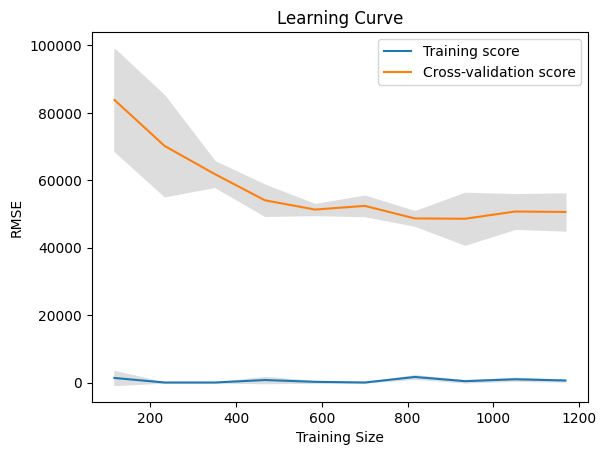

In [24]:
# Create a function to calculate RMSE
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curves
train_sizes, train_scores, test_scores = learning_curve(model1, X, y, train_sizes=train_sizes, cv=5, scoring=rmse_scorer)

# Calculate the means and standard deviations of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Draw learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()